In [30]:
# 이 코드에서는 ParseTree를 구성하고 형태소 분석을 수행해 봅니다. 

from matplotlib import font_manager, rc

path = "C:/windows/fonts/HMKMRHD.ttf" # matplot의 폰트를 지정하기 위한 경로 설정
font = font_manager.FontProperties(fname=path).get_name() # 폰트매니저 객체 생성
rc("font", family=font) # 폰트 변경

.


['she', 'sells', 'seashells', 'on', 'the', 'seashore']

In [31]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize

sentence = 'She sells seashells on the seashore.'
tokens = word_tokenize(sentence)

# 구두점 제거를 위한 패턴 정의
pattern = re.compile(r'[{0}]'.format(re.escape(punctuation)))

result = []
for token in tokens:
    if pattern.search(token): # 패턴에 맞는 문자를 공백으로 치환
        print(token)
    else:
        result.append(token.lower())
result

.


['she', 'sells', 'seashells', 'on', 'the', 'seashore']

In [32]:
from nltk import pos_tag # 형태소 분석모듈
from nltk.help import brown_tagset, upenn_tagset
# nltk.download('tagsets') # 1회만 실행

print(pos_tag(result)) # 형태소 분석결과 출력
print(upenn_tagset('VBZ')) # 형태소 태그에 대한 상세설명 출력
# print(upenn_tagset("N.*?"))
# print(brown_tagset())

[('she', 'PRP'), ('sells', 'VBZ'), ('seashells', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('seashore', 'NN')]
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
None


In [33]:
from nltk import pos_tag
tags = []

for term in pos_tag(result): # on, the와 같은 IT, DT 걸러내기
    if term[1] in ['IN', 'DT']:
        print('Skipped : ', term[0])
    else:
        print(term[0])
        tags.append(term[0])
        
tags

she
sells
seashells
Skipped :  on
Skipped :  the
seashore


['she', 'sells', 'seashells', 'seashore']

In [37]:
from nltk import Text

textObj = Text(tags) # 형태소 태깅
print(textObj.vocab().most_common()) # 형태소가 사용된 횟수 출력

[('she', 1), ('sells', 1), ('seashells', 1), ('seashore', 1)]


In [35]:
sentence = 'The little yellow dog barked at the Persian Cat'

tokens = word_tokenize(sentence)

pattern = re.compile(r'[{0}]'.format(re.escape(punctuation)))

result = []
for token in tokens:
    if pattern.search(token):
        print(token)
    else:
        result.append(token.lower())
result

['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat']

In [39]:
tags = []

for term in pos_tag(result):
    if term[1] in ['IN', 'DT']:
        print('Skipped : ', term[0])
    else:
        print(term[0])
        tags.append(term[0])
        
tags

Skipped :  the
little
yellow
dog
barked
Skipped :  at
Skipped :  the
persian
cat


['little', 'yellow', 'dog', 'barked', 'persian', 'cat']

In [40]:
# 언태그도 수행할 수 있음.
from nltk.tag import untag

tagged = pos_tag(result)
untag(tagged)

[tag[0] for tag in tagged]

['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat']

In [41]:
tagged, ['/'.join(tag) for tag in tagged]

([('the', 'DT'),
  ('little', 'JJ'),
  ('yellow', 'JJ'),
  ('dog', 'NN'),
  ('barked', 'VBD'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('persian', 'JJ'),
  ('cat', 'NN')],
 ['the/DT',
  'little/JJ',
  'yellow/JJ',
  'dog/NN',
  'barked/VBD',
  'at/IN',
  'the/DT',
  'persian/JJ',
  'cat/NN'])

In [50]:
from nltk import Text

# FreqDist 클래스는 단어를 Key로, 출현빈도를 Value로 갖는 사전 자료형과 유사한 형태 
textObj = Text(tagged) # 형태소 분석 수행
print(textObj.vocab().N()) # 전체 단어의 수 
print(textObj.vocab().freq(('the','DT'))) # 출현 확률 계산(key = the, value = DT?)

9
0.2222222222222222


In [51]:
for key in textObj.vocab().keys():
    if textObj.vocab().freq(key) > 0.2: # 확률(빈도)이 0.2보다 큰 FreqDist 객체에 대해서 수행 
        print('Skipped : ', key)

Skipped :  ('the', 'DT')


In [52]:
from nltk.probability import FreqDist
from collections import defaultdict

taggedTerms = FreqDist()
# taggedTerms = defaultdict(int)
# key = tuple(단어, 품사)
for key in textObj.vocab().keys():
    if key[1].startswith('DT'):
        # key[1] in ['DT']
        # re.search(r'DT.*)
        taggedTerms[key] = textObj.vocab().get(key)
        
taggedTerms, taggedTerms.N()

(FreqDist({('the', 'DT'): 2}), 2)

In [62]:
# gutenberg 말뭉치에 대해서 분석
from nltk.corpus import gutenberg

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
corpus = pattern.sub('',corpus)
tokens = word_tokenize(corpus)
tagged = pos_tag(tokens)

wordList = [pair[0] for pair in tagged] # ??
posList = [pair[1] for pair in tagged]

In [64]:
freqTagged = FreqDist()
for row in tagged: # tuple(단어, 품사) 형태로 저장된다. (key로 value 호출가능)
    freqTagged[row] += 1
    
freqWord = FreqDist()
for row in wordList: # 단어
    freqWord[row] += 1
    
freqPos = FreqDist()
for row in posList: # 품사
    freqPos[row] += 1

In [66]:
# 가장 많이 나온 단어들을 10개씩 출력
freqTagged.most_common(10), freqWord.most_common(10), freqPos.most_common(10) 

([(('to', 'TO'), 5099),
  (('the', 'DT'), 4822),
  (('and', 'CC'), 4412),
  (('of', 'IN'), 4264),
  (('I', 'PRP'), 2968),
  (('a', 'DT'), 2962),
  (('was', 'VBD'), 2369),
  (('not', 'RB'), 2227),
  (('in', 'IN'), 2086),
  (('it', 'PRP'), 2041)],
 [('to', 5099),
  ('the', 4822),
  ('and', 4412),
  ('of', 4264),
  ('I', 2968),
  ('a', 2962),
  ('was', 2369),
  ('her', 2333),
  ('not', 2227),
  ('in', 2086)],
 [('NN', 18524),
  ('IN', 17875),
  ('PRP', 14866),
  ('RB', 12479),
  ('DT', 12276),
  ('JJ', 10305),
  ('NNP', 9863),
  ('VB', 9022),
  ('VBD', 8948),
  ('CC', 6445)])

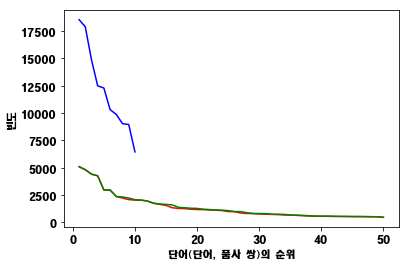

In [69]:
# 빈도에 따라 단어(word, pos 쌍) 순위를 그래프로 출력
import matplotlib.pyplot as plt

x = range(1,51)
y = [pair[1] for pair in freqTagged.most_common(50)]
_y = [pair[1] for pair in freqWord.most_common(50)]

_x = range(1,11)
_yy = [pair[1] for pair in freqPos.most_common(10)]

plt.plot(x, y, 'r-') # tuple(단어, 품사)
plt.plot(x, _y, 'g-') # 단어
plt.plot(_x, _yy, 'b-') # 품사
plt.xlabel('단어(단어, 품사 쌍)의 순위')
plt.ylabel('빈도')
plt.show()

In [73]:
# Hannanum 한국어 형태소 분석 및 품사 태깅 모듈
from konlpy.tag import Hannanum 

sentence = '내 친구는 잠을 많이 잔다.'

obj = Hannanum()
obj.morphs(sentence)
obj.pos(sentence)
# obj.nouns(sentence)
# obj.tagset

[('내', 'N'),
 ('친구', 'N'),
 ('는', 'J'),
 ('잠', 'N'),
 ('을', 'J'),
 ('많', 'P'),
 ('이', 'X'),
 ('자', 'P'),
 ('ㄴ다', 'E'),
 ('.', 'S')]

In [74]:
# 꼬꼬마 한국어 형태소 분석 및 품사 태깅 모듈(세종 말뭉치 2010년 배포판 기반)
from konlpy.tag import Kkma

sentence = '내 친구는 잠을 많이 잔다.'

obj = Kkma()
obj.morphs(sentence)
obj.pos(sentence)
# obj.nouns(sentence)
# obj.tagset

[('내', 'NP'),
 ('친구', 'NNG'),
 ('는', 'JX'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [75]:
# Komoran 한국어 형태소 분석 및 품사 태깅 모듈
from konlpy.tag import Komoran

sentence = '내 우리 그 이 나는 친구는 잠을 많이 잔다.'

obj = Komoran()
obj.morphs(sentence)
obj.pos(sentence)
# obj.nouns(sentence)
# obj.tagset

[('내', 'NP'),
 ('우리', 'NP'),
 ('그', 'MM'),
 ('이', 'MM'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('친구', 'NNG'),
 ('는', 'JX'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EF'),
 ('.', 'SF')]

In [77]:
# Okt 한국어 형태소 분석 및 품사 태깅 모듈
from konlpy.tag import Okt

obj = Okt()
obj.morphs(sentence)
obj.pos(sentence)
# obj.nouns(sentence)
# obj.tagset

[('내', 'Noun'),
 ('우리', 'Noun'),
 ('그', 'Noun'),
 ('이', 'Noun'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('친구', 'Noun'),
 ('는', 'Josa'),
 ('잠', 'Noun'),
 ('을', 'Josa'),
 ('많이', 'Adverb'),
 ('잔다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
# 한국어 말뭉치 다운로드 : https://ithub.korean.go.kr/user/corpus/corpusSearchManager.do

# 성능 비교
# 많이라는 부사로 테스트(품사 태깅)
# Kkma, komoran, okt > Hannanum

# 많이(부사) =? 품시태깅
# Kkma, komoran, okt > Hannanum

# 'ㅋㅋ'같은 신조어 처리
# Okt, Hannanum > Kkma, Komoran

# 명사 (불용어) - 신조어 무시
# Komoran > Hannaum > Okt > Kkma

In [78]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read() # 말뭉치 오픈
tokens = Kkma().pos(corpus) # 꼬꼬마 형태소 분석기로 말뭉치 분석

In [82]:
len(word_tokenize(corpus)), len(tokens), tokens[0] # 토큰화, 형태소분석결과의 길이를 출력 (테스트)

(4640, 10053, ('대한민국', 'NNG'))

In [80]:
rawList = FreqDist()
pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for term in word_tokenize(corpus):
    rawList[term] += 1

for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1

In [81]:
len(rawList), len(pairList), len(wordList), len(posList)

(2023, 1294, 1247, 38)

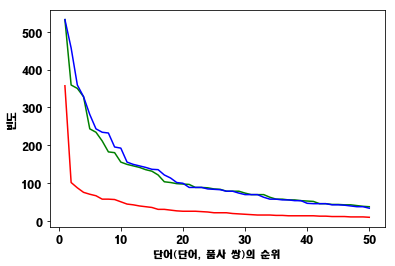

In [83]:
import math

x = range(1,51)

y = [pair[1] for pair in rawList.most_common(50)]
yy = [pair[1] for pair in pairList.most_common(50)]
yyy = [pair[1] for pair in wordList.most_common(50)]

_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]

# _x = range(1,11)
# _yy = [pair[1] for pair in freqPos.most_common(10)]

plt.plot(x, y, 'r-') 
plt.plot(x, yy, 'g-') 
plt.plot(x, yyy, 'b-') 
plt.xlabel('단어(단어, 품사 쌍)의 순위')
plt.ylabel('빈도')
plt.show()

In [ ]:
from nltk.probability import FreqDist
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = word_tokenize(corpus)
tagged = kkm.pos(corpus)

In [ ]:
freqTokens = FreqDist()
freqTagged = FreqDist()

for token in tokens:
    freqTokens[token] += 1

freqTokens = FreqDist()

for token in tagged:
    freqTagged[token] +=1

# word 단위, 품사 단위로 쪼개보기
freqWord = FreqDist()
for token in tagged:
    freqWord[token[0]] +=1

freqPos = FreqDist()
for token in tagged:
    freqPos[token[0]] +=1

In [ ]:
freqTagged.N(), freqWord.N()

In [ ]:
# 구두점, 부사류만 제거
filteredList = FreqDist()
for token in freqTagged: # tupple(단어, 품사)
    if token[1] not in ["JKG", "JKO", "SP"]: # 제거하고 싶은 품사 
        filteredList[token] = freqTagged[token]

In [ ]:
freqTagged.N(), freqTagged.most_common(50)

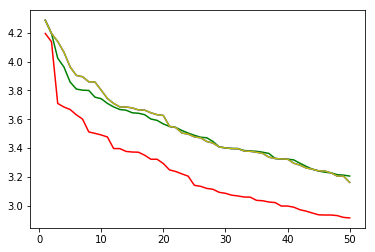

In [17]:
from konlpy.tag import Okt, Kkma 
import matplotlib.pyplot as plt
# 형태소분석을 한 것이 좀 더 선형에 가까운 그래프를 보여준다. 
# 형태소분석을 거치고 난 결과값이 더 균등하므로 학습에 유리하다. 
import math, os
kkm = Kkma()

# 14일에 수집했던 뉴스 기사들에 대해 형태소 분석 후 그래프 그려보기
for file in os.listdir("./0314_DownloadedNewstxts"):
    if file.endswith(".txt"):
        with open("./0314_DownloadedNewstxts/" + file, encoding = "utf-8") as f:
            corpus += f.read()
            
tokens = word_tokenize(corpus)
tagged = kkm.pos(corpus)
freqTokens = FreqDist()

freqTokens = FreqDist()
for token in tokens:
    freqTokens[token] += 1

freqTagged = FreqDist()
for token in tagged:
    freqTagged[token] +=1

# word 단위, 품사 단위로 쪼개보기
freqWord = FreqDist()
for token in tagged:
    freqWord[token[0]] +=1

freqPos = FreqDist()
for token in tagged:
    freqPos[token[0]] +=1    

x = range(1, 51)
y = [pair[1] for pair in freqTokens.most_common(50)] # 빈도
yy = [pair[1] for pair in freqTagged.most_common(50)] 
yyy = [pair[1] for pair in freqWord.most_common(50)] 
xx = range(1, 31)
yyyy = [pair[1] for pair in freqPos.most_common(50)] 

_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]
_yyyy = [math.log10(_) for _ in yyyy]

plt.plot(x, _y, "r-")
plt.plot(x, _yy, "g-")
plt.plot(x, _yyy, "b-")
plt.plot(x, _yyyy, "y-")
plt.show()

In [44]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.corpus import gutenberg
from konlpy.corpus import kolaw, kobill
from string import  punctuation
import re

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
# corpus = kolaw.open(kolaw.fileids()[0]).read()
# corpus=""
for file in kobill.fileids():
    corpus += kobill.open(kobill.fileids())

corpus = kobill.open(kobill.fileids()[0]).read()
corpus = re.sub(r"[%s]" % re.escape(punctuation), " ", corpus)

FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\brsta\\Anaconda3\\lib\\site-packages\\konlpy/data/corpus/kobill/['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']"

In [42]:
tokens = word_tokenize(corpus)
result = []
for term in tokens:
    result.extend(kkm.pos(term))
bigram = BigramCollocationFinder.from_words(result) # bigram 객체 생성
measure = BigramAssocMeasures()

In [43]:
# bigram.nbest(measure.pmi, 10) # 제일 무난한 통계 기법. 감성 분석에도 응용됨. 
bigram.nbest(measure.chi_sq, 10) # 제일 무난한 통계 기법. 감성 분석에도 응용됨. 

[(('``', 'SW'), ('나', 'NP')),
 (('강제', 'NNG'), ('노역', 'NNG')),
 (('경자', 'NNG'), ('유전', 'NNG')),
 (('공중', 'NNG'), ('도덕', 'NNG')),
 (('교전', 'NNG'), ('상태', 'NNG')),
 (('기본적', 'NNG'), ('인권', 'NNG')),
 (('내부', 'NNG'), ('규율', 'NNG')),
 (('누구', 'NP'), ('든지', 'JX')),
 (('다수', 'NNG'), ('표', 'NNG')),
 (('담임', 'NNG'), ('권', 'XSN'))]